# Import Library and Imputed Dataset

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from mahalanobis import Mahalanobis
from scipy.stats import chi2
from func import custom_desc, custom_info, zero_std, categorical_converter, anderson_normality_test, anderson_result_extractor, outlier_counter

In [2]:
df = pd.read_csv('csv/imputed.csv')

Sebelumnya, kita telah melakukan EDA secara singkat untuk keperluan mengisi missing value. Maka, dibagian ini kita akan berfokus dengan EDA yang (sebisa mungkin) menyeluruh untuk mendapatkan temuan lanjutan. Akan ada beberapa analisa yang sebenarnya sudah dilakukan pada bagian sebelumnya, namun akan ditampilkan lagi untuk analisa lebih lanjut. 

# Univariate Analysis (Numerical)

Dimulai dari target, kita lihat terlebih dahulu bagaimana kondisi datanya menggunakan Countplot.

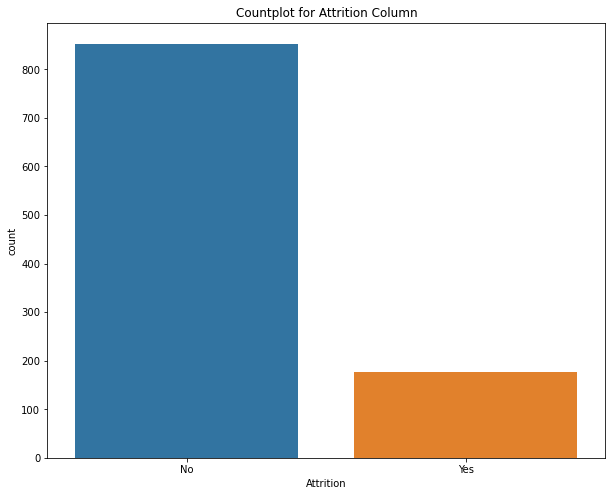

In [3]:
plt.figure(figsize = (10, 8))
plot=sns.countplot(x = 'Attrition', data = df)
plt.title("Countplot for Attrition Column")
plt.show()

In [4]:
df.Attrition.value_counts(normalize = True)

No     0.82896
Yes    0.17104
Name: Attrition, dtype: float64

**Temuan** : Kondisi data pada feature Attrition merupakan Imbalance Data.

In [5]:
numerical_features = df.select_dtypes(exclude='O')

In [6]:
numerical_features_melt = numerical_features.melt()
numerical_features_melt.head()

,variable,value
0,Age,50.0
1,Age,36.0
2,Age,21.0
3,Age,50.0
4,Age,52.0


/home/ariandy/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/ariandy/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


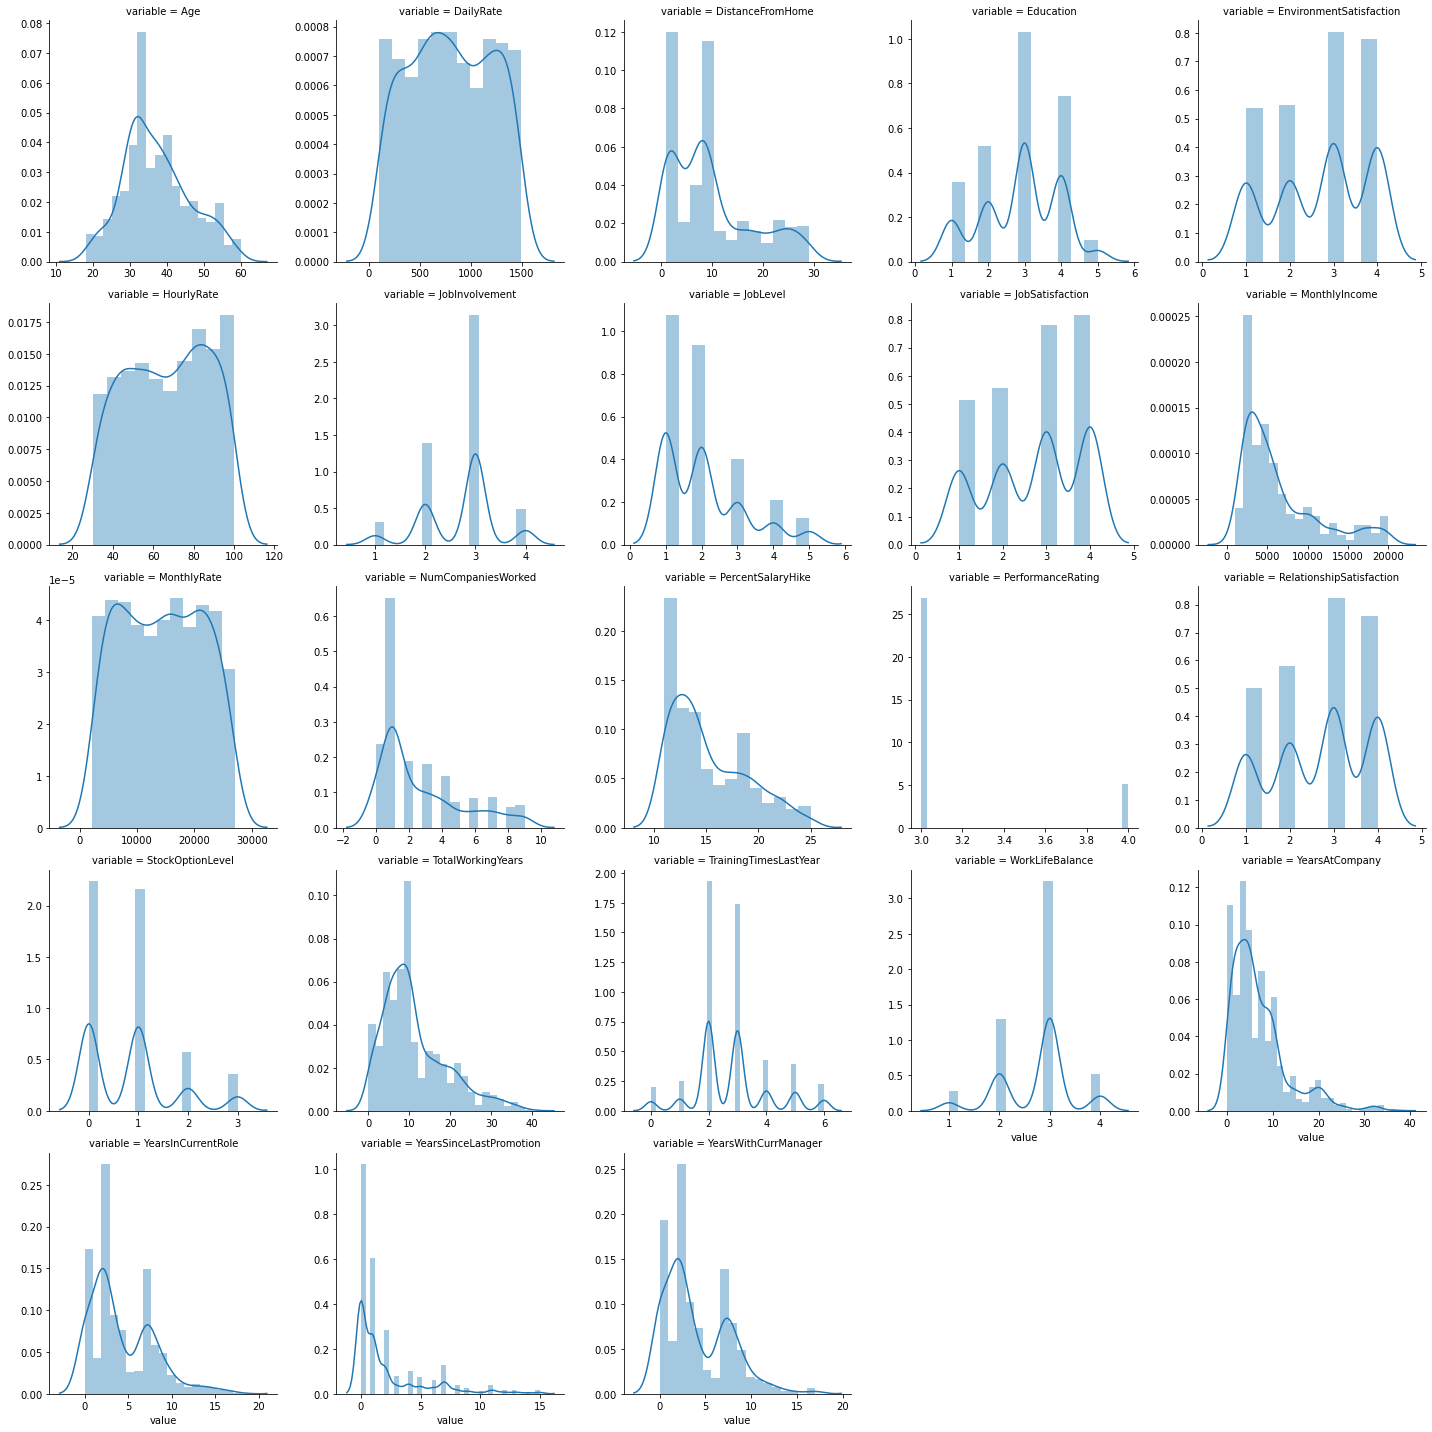

In [7]:
#Univariate Analysis Plotting Distribution plot for Numeric Variables
fg = sns.FacetGrid(numerical_features_melt, col='variable',sharex=False, sharey=False, size=4,col_wrap=5)
fg.map(sns.distplot,'value')
plt.show()

In [8]:
totalworkingyears_arr = []
anderson_stat_arr = []
crit_val_arr = []
accepted_hypothesis_arr = []
result_arr = []

for i in numerical_features:
    totalworkingyears_arr.append(i)

    raw = anderson_normality_test(df[i])
    
    anderson_stat, crit_val, accepted_hypothesis = anderson_result_extractor(raw, 5)
    anderson_stat_arr.append(anderson_stat)
    crit_val_arr.append(crit_val)
    accepted_hypothesis_arr.append(accepted_hypothesis)

    if accepted_hypothesis == 'H0':        
        result_arr.append('Berdistribusi normal')
    else:
        result_arr.append('Tidak berdistribusi normal')

normality_df = pd.DataFrame({
    'TotalWorkingYears': totalworkingyears_arr,
    'Anderson Statistic': anderson_stat_arr,
    'Critical Value': crit_val_arr,
    'Accepted Hypothesis': accepted_hypothesis_arr,
    'Result': result_arr
})

print('Significance Level = 5%')
normality_df

Significance Level = 5%


,TotalWorkingYears,Anderson Statistic,Critical Value,Accepted Hypothesis,Result
0,Age,8.624723,0.784,HA,Tidak berdistribusi normal
1,DailyRate,10.706414,0.784,HA,Tidak berdistribusi normal
2,DistanceFromHome,41.943765,0.784,HA,Tidak berdistribusi normal
3,Education,44.947098,0.784,HA,Tidak berdistribusi normal
4,EnvironmentSatisfaction,53.873467,0.784,HA,Tidak berdistribusi normal
5,HourlyRate,12.856666,0.784,HA,Tidak berdistribusi normal
6,JobInvolvement,99.755328,0.784,HA,Tidak berdistribusi normal
7,JobLevel,67.849425,0.784,HA,Tidak berdistribusi normal
8,JobSatisfaction,54.726291,0.784,HA,Tidak berdistribusi normal
9,MonthlyIncome,63.867079,0.784,HA,Tidak berdistribusi normal


**Temuan** : Semua numerical features tidak berdistribusi normal berdasarkan uji normalitas Anderson-Darling dengan significance level sebesar 5%

# Univariate Outlier Analysis

In [9]:
def boxplot_for_outlier(data):
    data=data.melt()
    plt.figure(figsize=(15,10))
    plt.title("Boxplots for Numerical variables")
    bp=sns.boxplot(x='value',y='variable',data=data)
    bp.set_xticklabels(bp.get_xticklabels())
    plt.show()

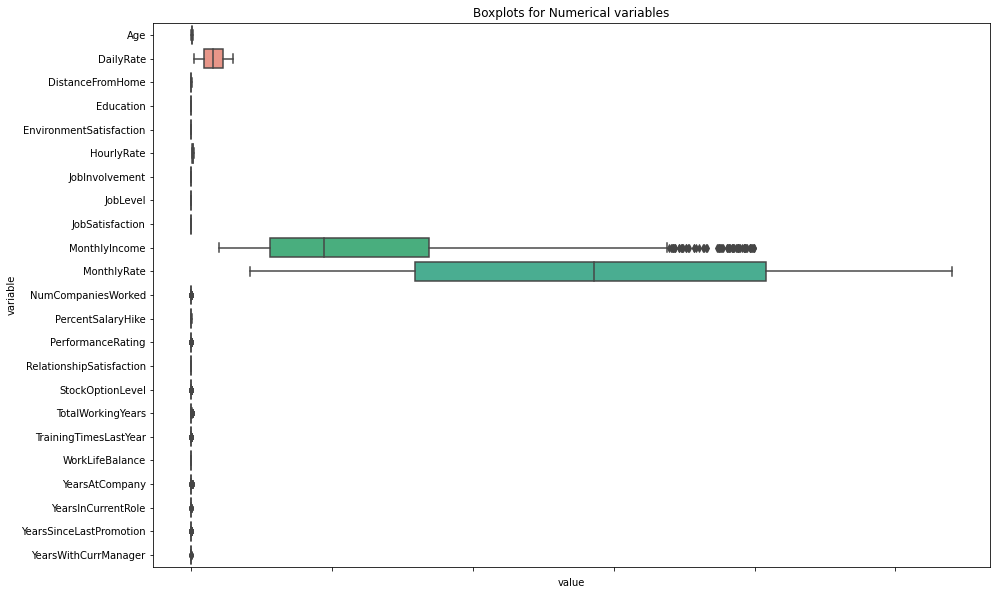

In [10]:
boxplot_for_outlier(numerical_features)

Berhubung plot diatas menghasilkan grafik yang kurang nyaman dilihat, maka akan dipecah menjadi beberapa bagian.

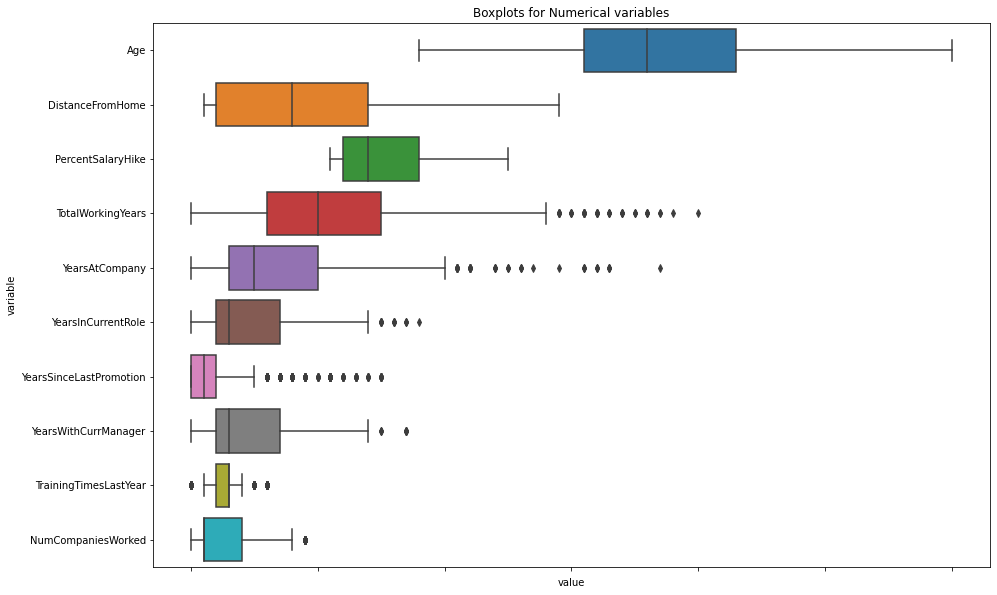

In [11]:
numerical_features=df[['Age','DistanceFromHome','PercentSalaryHike','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','YearsSinceLastPromotion','TrainingTimesLastYear','NumCompaniesWorked']]
boxplot_for_outlier(numerical_features)

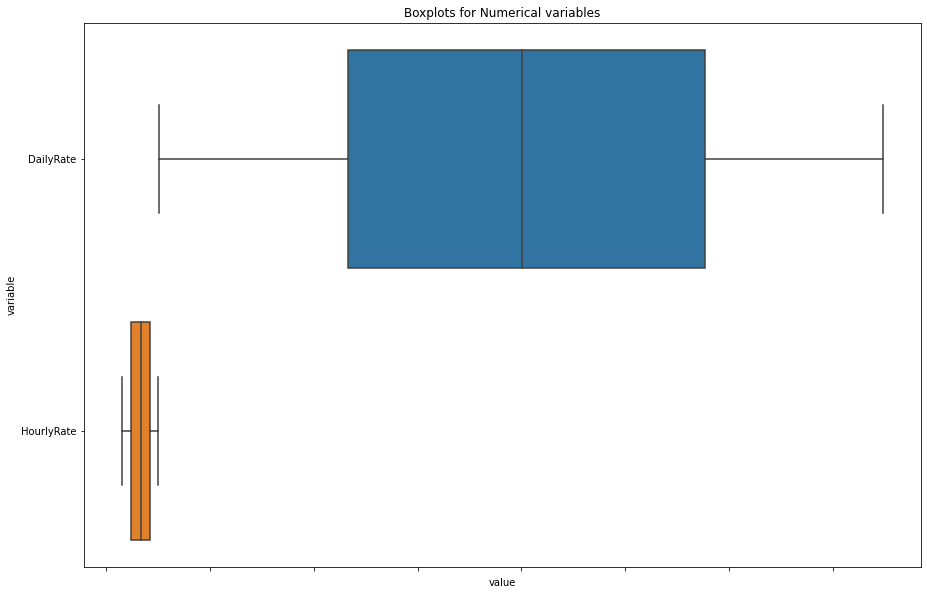

In [12]:
numerical_features=df[['DailyRate','HourlyRate']]
boxplot_for_outlier(numerical_features)

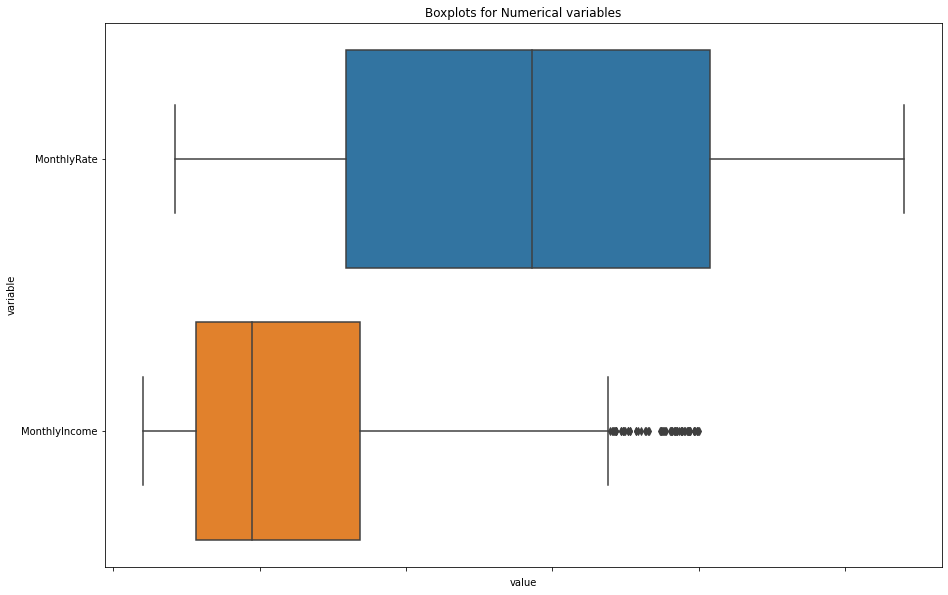

In [13]:
numerical_features=df[['MonthlyRate','MonthlyIncome']]
boxplot_for_outlier(numerical_features)

**Temuan** : Terdapat outlier pada feature berikut.
- TotalWorkingYears
- YearsAtCompany
- YearsInCurrentRole
- YearsSinceLastPromotion
- YearsWithCurrManager
- TrainingTimesLastYear
- NumCompaniesWorked
- MonthlyIncome


In [14]:
outlier_columns  = ['TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole',
                    'YearsSinceLastPromotion', 'YearsWithCurrManager', 'TrainingTimesLastYear',
                    'NumCompaniesWorked', 'MonthlyIncome']

counter_arr = []
percentage_arr = []

for i in outlier_columns:
    counter, percentage = outlier_counter(df, i)
    counter_arr.append(counter)
    percentage_arr.append(percentage)

outlier_df = pd.DataFrame({
    'Outlier Columns': outlier_columns,
    'Outlier Count': counter_arr,
    'Percentage': percentage_arr
})

outlier_df

,Outlier Columns,Outlier Count,Percentage
0,TotalWorkingYears,45,4.37
1,YearsAtCompany,43,4.18
2,YearsInCurrentRole,16,1.55
3,YearsSinceLastPromotion,149,14.48
4,YearsWithCurrManager,9,0.87
5,TrainingTimesLastYear,163,15.84
6,NumCompaniesWorked,38,3.69
7,MonthlyIncome,68,6.61


# Multivariate Outlier Analysis

In [15]:
numerical_features = df.select_dtypes(exclude='O')
mahalanobis_df = numerical_features.copy()

Selanjutnya, akan dilakukan Multivariate Outlier Analysis menggunakan Mahalanobis Distance.

In [16]:
mahalanobis_df['mahalanobis_distance'] = Mahalanobis(np.array(mahalanobis_df), len(mahalanobis_df)).distances

In [17]:
ppf = chi2.ppf(0.99,df=len(numerical_features.columns)-1)
ppf

40.289360437593864

Apabila nilai Mahalanobis Distance lebih dari nilai Percent point function (yang pada kasus ini bernilai 40.289360437593864), ada kemungkinan bahwa ia adalah outlier.
Akan kita cek terlebih dahulu dengan cara membandingkan Mahalanobis Distance dan juga ppf.

In [18]:
len(mahalanobis_df[mahalanobis_df.mahalanobis_distance > ppf])

0

**Temuan** : Dengan membandingkan Mahalanobis Distance dan ppf (dengan confidence level 0.99), tidak ditemukan adanya outlier. 

Kita lakukan double check menggunakan cdf (Cumulative distribution function).

In [19]:
cdf = chi2.cdf(mahalanobis_df['mahalanobis_distance'], len(numerical_features.columns)-1)
mahalanobis_df['P-value'] = 1 - cdf

In [20]:
def callout_outlier(p_values):
    if p_values < 0.01:
        return 'Outlier'
    else:
        return 'Non-Outlier'

In [21]:
mahalanobis_df['Outlier Detector'] = mahalanobis_df['P-value'].apply(callout_outlier)

In [22]:
mahalanobis_df = mahalanobis_df.drop(columns=['mahalanobis_distance', 'P-value'], axis=1)

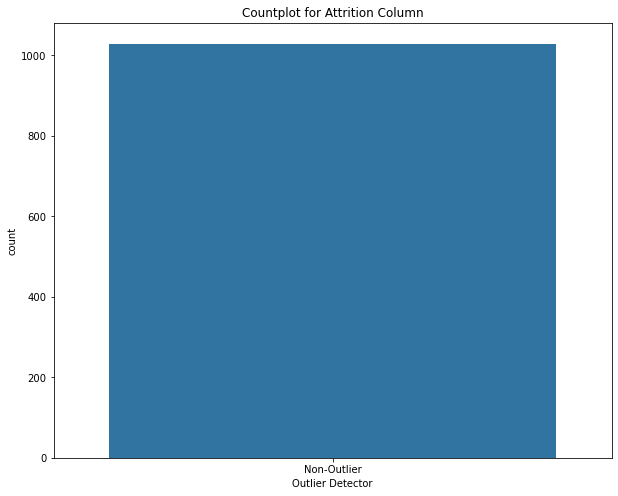

In [23]:
plt.figure(figsize = (10, 8))
plot=sns.countplot(x = 'Outlier Detector', data = mahalanobis_df)
plt.title("Countplot for Attrition Column")
plt.show()

In [24]:
# sns.pairplot(mahalanobis_df)
mahalanobis_df['Outlier Detector'].value_counts(normalize = True)

Non-Outlier    1.0
Name: Outlier Detector, dtype: float64

**Temuan** : Dengan Mahalanobis Distance, dinyatakan bahwa keseluruhan data dinyatakan sebagai bukan outlier

Dengan temuan ini, maka saya memutuskan untuk tidak melakukan drop beberapa rows yang dinyatakan sebagai univariate outlier, karena:
- Dataset berukuran kecil. Membuang beberapa rows akan memungkinkan mengubah karakteristik data.
- Meskipun beberapa rows dinyatakan sebagai univariate outlier, namun secara keseluruhan, ia dinyatakan bukan outlier dengan menggunakan Mahalanobis Distance. 

# Numeric Bivariate Analysis
